In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<head><h1>importing test and train</h1></head>

In [ ]:
gametr=pd.read_csv("https://cdn.skillenza.com/files/5767f071-8cad-4310-af98-2a62680694ed/Train.csv")
gamete=pd.read_csv("https://cdn.skillenza.com/files/3d0bea9f-bfb8-441b-90fc-bef0b06f3c40/Test.csv")

<h2>dropping y</h2>

In [ ]:
Y=gametr.Global_Sales
y=gametr.drop("Global_Sales",axis=1)

<h2>concatenate train and test</h2>

In [ ]:
game=y.append(gamete)
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
game.shape

(16719, 14)

<h2>EDA</h2>

In [ ]:
game.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
game.Developer.nunique()

1696

In [ ]:
game.Publisher.nunique()

580

In [ ]:
game.Name.value_counts()

Need for Speed: Most Wanted                         12
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
Ratatouille                                          9
FIFA 14                                              9
                                                    ..
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Perfect Weapon                                       1
Dance Sensation!                                     1
Name: Name, Length: 11562, dtype: int64

In [ ]:
game.Name.fillna("Unknown",inplace=True)

In [ ]:
dataframe = pd.DataFrame(game, columns = ['Name', 'Platform', 'Year_of_Release', 'Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'])
rslt_df = dataframe.loc[dataframe['Name'] == "Unknown"]
  
print(rslt_df)

          Name Platform  Year_of_Release Genre              Publisher  \
659    Unknown      GEN           1993.0   NaN  Acclaim Entertainment   
12103  Unknown      GEN           1993.0   NaN  Acclaim Entertainment   

       NA_Sales  EU_Sales  JP_Sales  Critic_Score  Critic_Count User_Score  \
659        1.78      0.53      0.00           NaN           NaN        NaN   
12103      0.00      0.00      0.03           NaN           NaN        NaN   

       User_Count Developer Rating  
659           NaN       NaN    NaN  
12103         NaN       NaN    NaN  


In [ ]:
game.Year_of_Release.fillna("NotGiven",inplace=True)

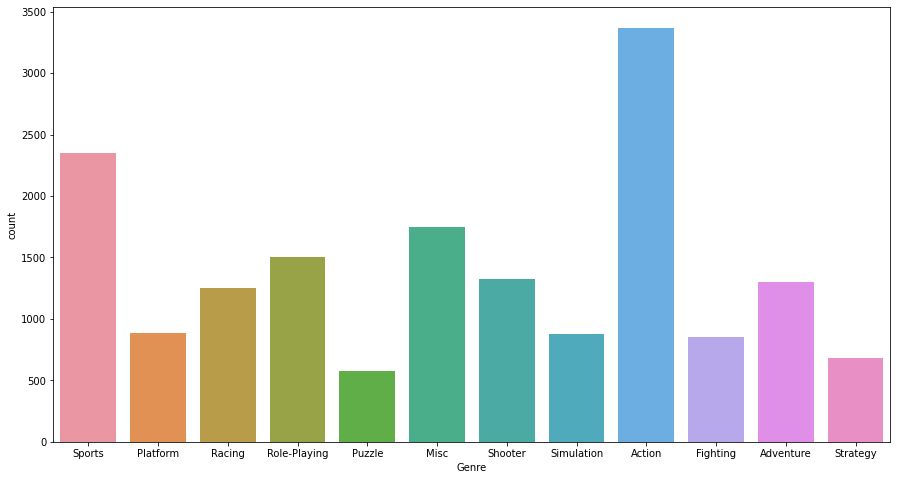

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Genre",data=game)

In [ ]:
game.Genre.fillna("Misc",inplace=True)

In [ ]:
game.Publisher.fillna("Unknown",inplace=True)

In [ ]:
game.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
game.Critic_Score.mean()

68.96767850559173

In [ ]:
game.Critic_Score.fillna(68.96767850559173,inplace=True)

In [ ]:
game.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score          0
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
game.Critic_Count.unique()

array([ 51.,  nan,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,
        93.,   5.,   6., 103., 102., 106.,   3., 104.])

In [ ]:
game.Critic_Count.mode()

0    4.0
dtype: float64

In [ ]:
game.Critic_Count.fillna(4,inplace=True)

In [ ]:
game.Critic_Count.unique()

array([ 51.,   4.,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,  93.,
         5.,   6., 103., 102., 106.,   3., 104.])

In [ ]:
game.User_Count.mode()

0    4.0
dtype: float64

In [ ]:
game.User_Count.fillna(4,inplace=True)

In [ ]:
game.Developer.fillna("Unknown",inplace=True)

In [ ]:
game['User_Score'] = game['User_Score'].replace('tbd', np.nan)
print(game['User_Score'].isna().sum())


9129


In [ ]:
game.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'], dtype=object)

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  object 
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     16719 non-null  float64
 9   Critic_Count     16719 non-null  float64
 10  User_Score       7590 non-null   object 
 11  User_Count       16719 non-null  float64
 12  Developer        16719 non-null  object 
 13  Rating           9950 non-null   object 
dtypes: float64(6), object(8)
memory usage: 2.4+ MB


In [ ]:
game.User_Score.mode()

0    7.8
dtype: object

In [ ]:
game.User_Score.fillna(7.8,inplace=True)

In [ ]:
game.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
game.Rating.replace('K-A','E')

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
2138       M
2139       M
2140     NaN
2141    E10+
2142       E
Name: Rating, Length: 16719, dtype: object

In [ ]:
game.Rating.fillna('RP',inplace=True)

In [ ]:
game.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [ ]:
game = game.astype({"User_Score": float})

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  object 
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     16719 non-null  float64
 9   Critic_Count     16719 non-null  float64
 10  User_Score       16719 non-null  float64
 11  User_Count       16719 non-null  float64
 12  Developer        16719 non-null  object 
 13  Rating           16719 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.4+ MB


In [ ]:
 game.User_Score = game.User_Score.apply(lambda x: x*10)

In [ ]:
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.000000,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,68.967679,4.0,78.0,4.0,Unknown,RP
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.000000,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.000000,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,68.967679,4.0,78.0,4.0,Unknown,RP


In [ ]:
game.drop(["Name","Platform","Genre","Publisher","Developer"],axis=1,inplace=True)

In [ ]:
scaledata=pd.get_dummies(game)
scaledata.shape

(16719, 55)

In [ ]:
scaler = MinMaxScaler().fit(scaledata)
scaledData=scaler.transform(scaledata)

In [ ]:
X= pd.DataFrame(scaledData)
x=X.iloc[:14576]
Test_data=X.iloc[14576:]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,Y,train_size = 0.8, test_size = 0.2,random_state =42)
model=GradientBoostingRegressor(n_estimators=100,max_depth=3).fit(x_train,y_train)
y_pred=model.predict(x_test)
r2=mean_squared_error(y_test,y_pred,squared=False)
print(model.score(x_test,y_test))
print(r2)

0.9889708246707706
0.15605807462929597


In [ ]:
y_final=model.predict(Test_data)
y_final=pd.DataFrame(y_final)

In [ ]:
Y_final=pd.concat([gamete.Name,y_final],axis=1)

In [ ]:
Y_final.rename(columns={0:'Global sales'}, inplace=True,)
Y_final.to_csv('D:/Work Space/Hackathon_result.csv',index= False)

FileNotFoundError: ignored